# Continuous Distributions

Until now we have been dealing with discrete distributions, where the random variable can only take on a finite number of values. In this notebook, we will introduce continuous distributions, where the random variable can take on any value in a given range.

The continuous distributions differ from the discrete distributions in that the probability of a single value is zero. Instead, the probability is defined over intervals. Just like the probability mass function fully describes a discrete distribution, a continuous distribution is fully described by its probability density function (PDF).


A PDF is a non-negative function $f(x)$ that integrates to 1 over the entire real line. Let $X$ be a continuous random variable with PDF $f(x)$. Then, for any two values. 

$$
P(a \leq X \leq b) = \int_{a}^{b} f(x) dx
$$

The CDF of a continuous random variable is defined just as in the discrete case with the sum replaced by an integral:

$$
F(x) = P(X \leq x) = \int_{-\infty}^{x} f(t) dt
$$


## The Uniform Distribution on \[-1, 1\]

$$
X \sim \text{Uniform}(-1, 1)
$$

$$
f(x) = \begin{cases}
\frac{1}{2} & -1 \leq x \leq 1\\
0 & \text{otherwise}
\end{cases} \\
$$

The density function of the uniform distribution is a constant over the interval \([-1, 1]\). The probability of the random variable falling in any subinterval of \([-1, 1]\) is proportional to the length of the subinterval.


Text(0, 0.5, 'Density')

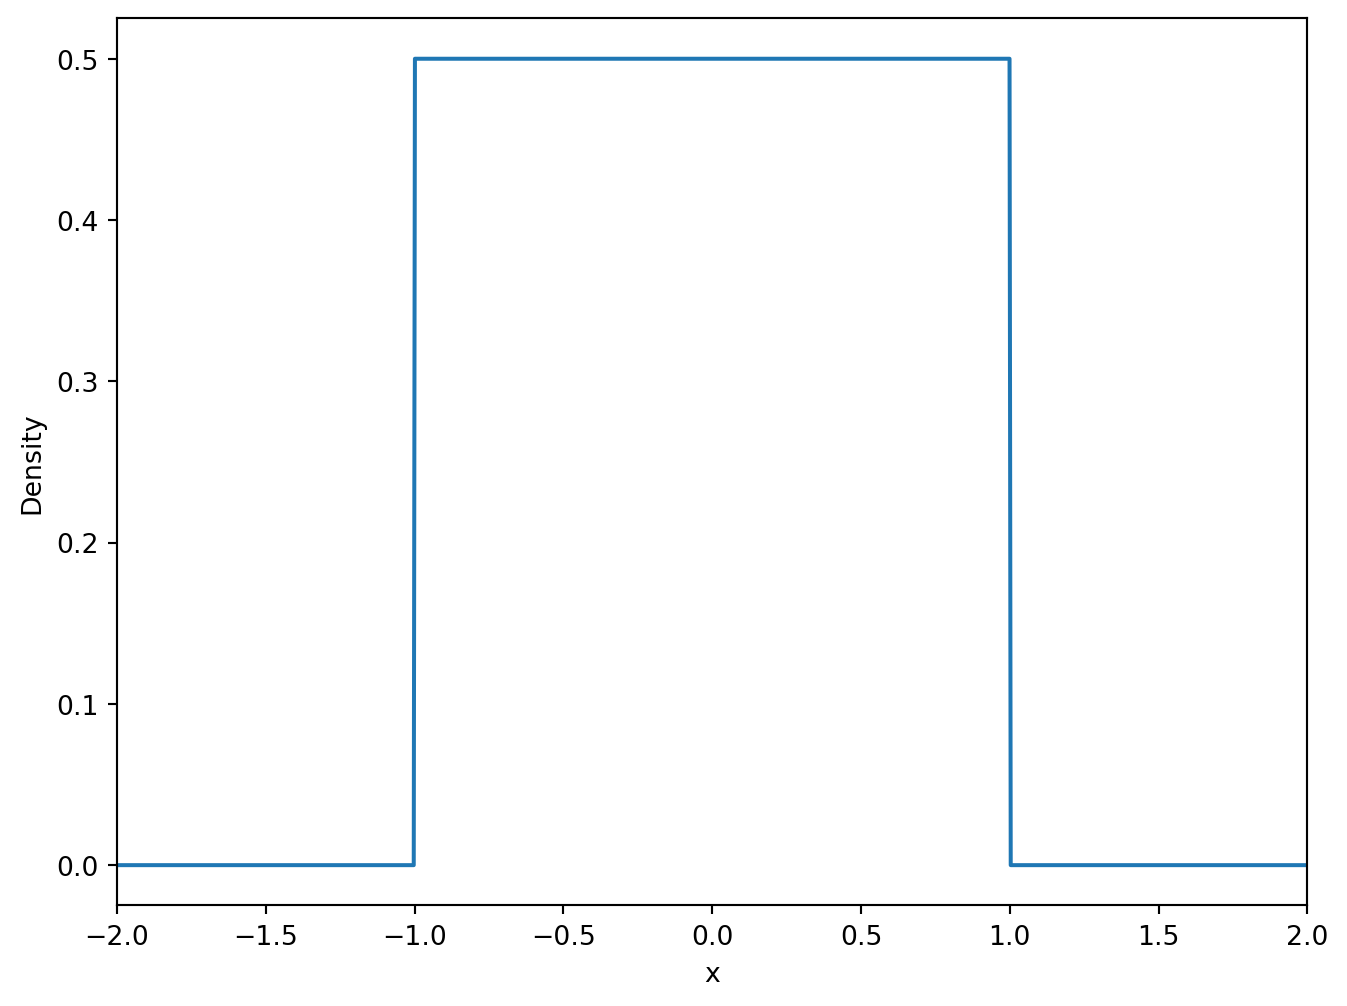

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Define the range of x
x = np.linspace(-2, 2, 1000)

# Calculate the density of the uniform distribution
y = stats.uniform.pdf(x, loc=-1, scale=2)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlim([-2, 2])
plt.xlabel('x')
plt.ylabel('Density')

In [2]:
# Draw 10 random values from the uniform distribution between -1 and 1

x_unif = np.random.uniform(low=-1, high=1, size=10)
x_unif

array([-0.56383571, -0.41319793,  0.08830973,  0.32925499, -0.79986684,
        0.63261843,  0.76546489, -0.86681886,  0.99470386, -0.91406888])

In [3]:
# How many of the random numbers are smaller than 0? Use np.sum to count the number of random numbers that satisfy the condition.

np.sum(x_unif < 0)

# How many of the random numbers are between 0 and 0.5?

np.sum((x_unif > 0) & (x_unif < 0.5))

2

In [4]:
# Calculate the probability of X being less than 0. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)

stats.uniform.cdf(0, loc=-1, scale=2)

# The following code calculates the probability that the event X < 0.5 occurs (under the uniform distribution on [-1, 1]).

stats.uniform.cdf(0, loc=-1, scale=2)

# Calculate the probability of X being greater than 0.5.

1 - stats.uniform.cdf(0.5, loc=-1, scale=2)

# Calculate the probability that the event X is in the interval [0, 0.5] occurs.

stats.uniform.cdf(0.5, loc=-1, scale=2) - stats.uniform.cdf(0, loc=-1, scale=2)

# Compare the probability with the number of values in the simulation that lie in the interval [0, 0.5].

np.sum((x_unif > 0) & (x_unif < 0.5))

2

## Moments of a Continuous Distribution

The moments of a continuous distribution are defined in the same way as for a discrete distribution, but the summation is replaced by an integral. The expected value of a continuous random variable $X$ is given by:

$$
E(X) = \int_{-\infty}^{\infty} x f(x) dx
$$

The variance of a continuous random variable $X$ is given by:

$$
\text{Var}(X) = \int_{-\infty}^{\infty} (x - E(X))^2 f(x) dx
$$

All properties of the expected value and variance that we have seen for discrete distributions also hold for continuous distributions.


# The Exponential Distribution

We have already seen the geometric distribution, which models the number of trials until the first success in a sequence of independent Bernoulli trials. The exponential distribution is the continuous analog of the geometric distribution.

The PDF of the exponential distribution is given by:

$$
f(x) = \begin{cases}
\lambda e^{-\lambda x} & x \geq 0\\
0 & x < 0
\end{cases}
$$

:::{#exr-exponential-distribution-CDF}
## CDF of the Exponential Distribution

Calculate the CDF of the exponential distribution.
:::


:::{#exr-exponential-distribution-expected-value}
## Expected Value of the Exponential Distribution

Calculate the expected value of the exponential distribution.

:::

:::{#exr-exponential-distribution-variance}
## Variance of the Exponential Distribution

Calculate the variance of the exponential distribution.

:::



Text(0, 0.5, 'Density')

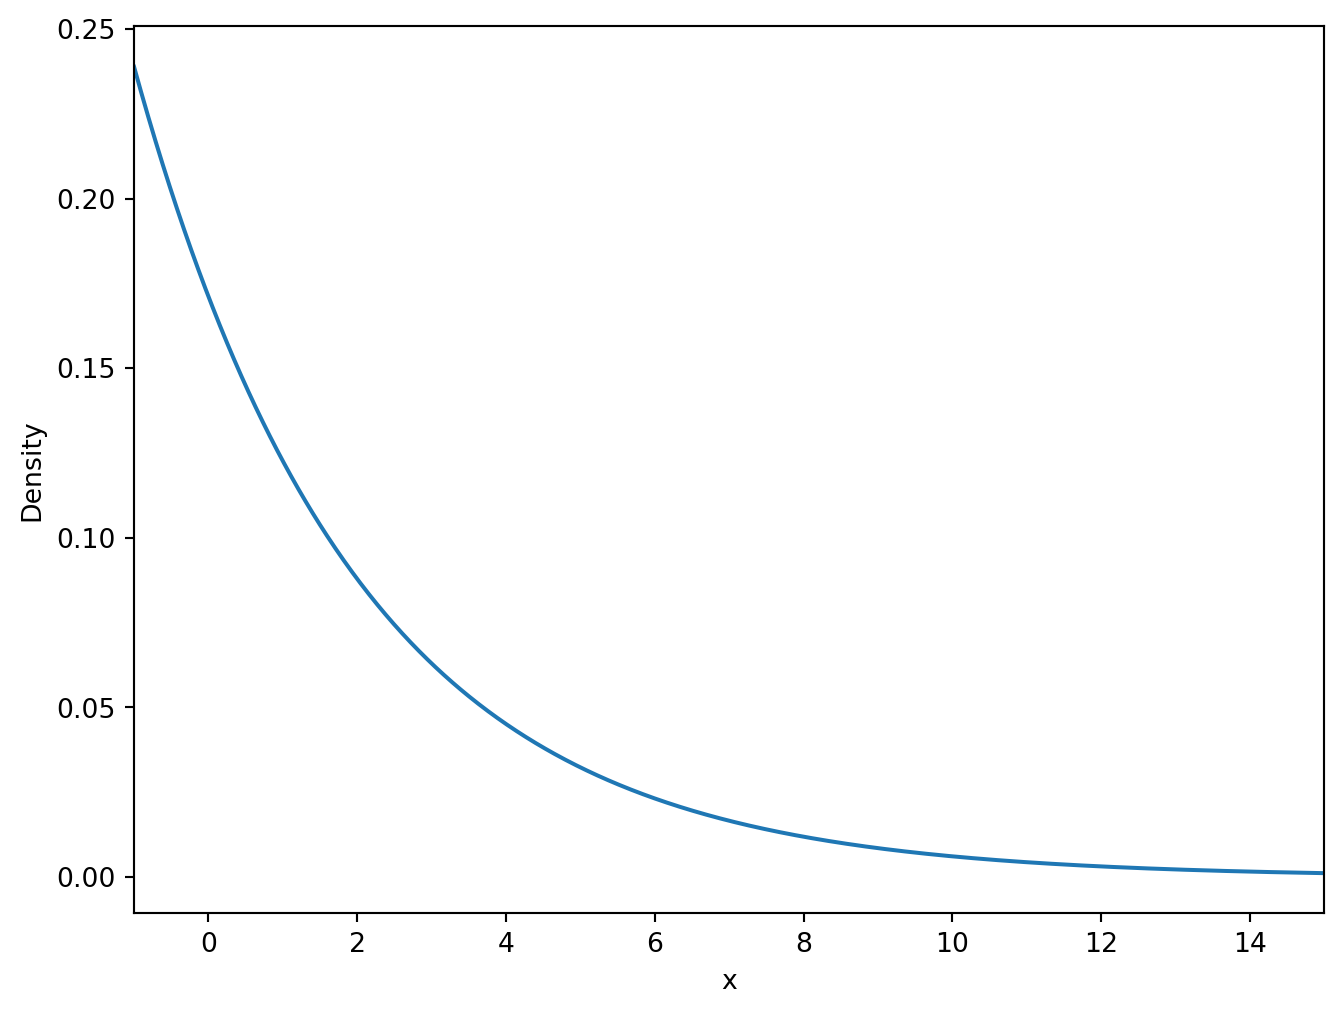

In [5]:
# Create a grid of 1000 points between -1 and 15
x = np.linspace(-1, 15, 1000)

# Calculate the density of the exponential distribution with rate parameter 1

y = stats.expon.pdf(x, loc=-2, scale=3)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlim([-1, 15])
plt.xlabel('x')
plt.ylabel('Density')


## Die Normalverteilung

Die Familie der Normalverteilungen wird durch zwei Parameter definiert: den Erwartungswert $\mu$ und die Standardabweichung $\sigma$. Die Dichte der Normalverteilung ist gegeben durch die Formel:


$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

Weil wir diese Verteilung sehr oft benutzen werden, führen wir eine spezielle Notation für die Normalverteilung ein:

$$
X \sim N(\mu, \sigma^2)
$$

In dieser Notation bedeutet $X$ ist normalverteilt mit Erwartungswert $\mu$ und Varianz $\sigma^2$. Sie brauchen die Formel für die Dichte der Normalverteilung nicht auswendig zu lernen, allerdings müssen Sie wissen, wie die Dichte in Abhängigkeit von den Parametern $\mu$ und $\sigma$ aussieht.

$$
\begin{align*}
E(X) & = \mu \\
Var(X) & = \sigma^2
\end{align*}
$$

Text(0, 0.5, 'Dichte')

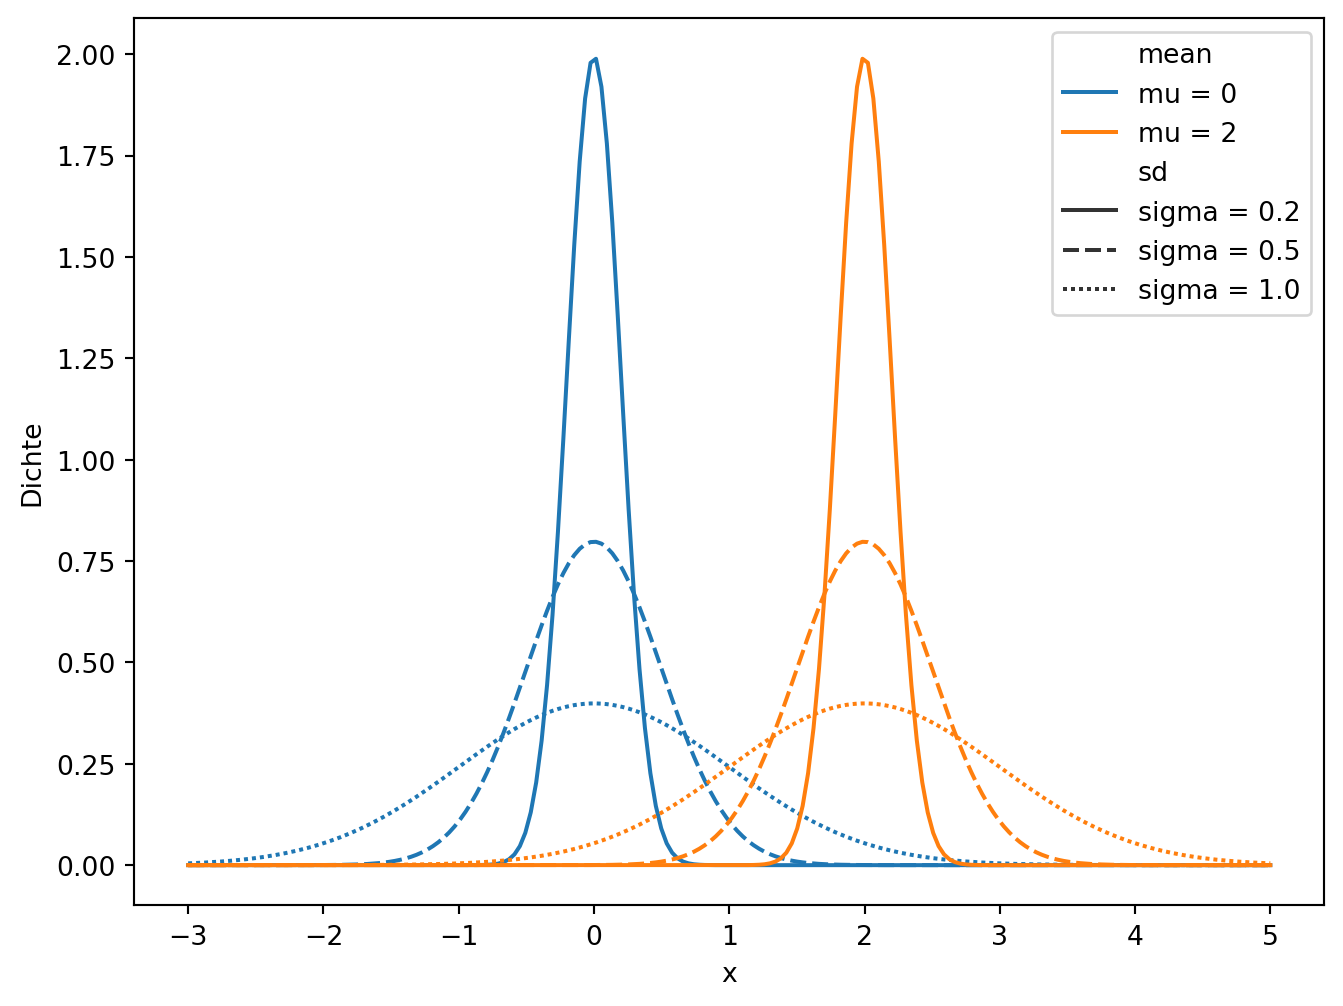

In [6]:
# Define the means and standard deviations
means = [0, 2]
sds = [0.2, 0.5, 1]

# Create a grid of x values
x = np.linspace(-3, 5, 200)

# Create a DataFrame with all combinations of means, sds, and x values
df = pd.DataFrame([(mean, sd, x_val, stats.norm.pdf(x_val, mean, sd)) 
                   for mean in means for sd in sds for x_val in x], 
                  columns=['mean', 'sd', 'x', 'y'])

# Create labels for mean and sd
df['mean'] = 'mu = ' + df['mean'].astype(str)
df['sd'] = 'sigma = ' + df['sd'].astype(str)

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='x', y='y', hue='mean', style='sd')
plt.xlabel('x')
plt.ylabel('Dichte')

Eine Art und Weise, wie eine Normalverteilung entstehen kann, ist die Summe von unabhängigen Zufallsvariablen. Das ist der Inhalt des Zentralen Grenzwertsatzes, der besagt, dass die Summe von unabhängigen Zufallsvariablen, die nicht notwendigerweise normalverteilt sind, für eine große Anzahl von Summanden normalverteilt ist.

Um den Zentralen Grenzwertsatz zu illustrieren, betrachten wir das folgende Spiel.

([<matplotlib.axis.XTick at 0x7f9f5eaf75c0>,
 [Text(0, 0, '0'),
  Text(4, 0, '4'),
  Text(8, 0, '8'),
  Text(12, 0, '12'),
  Text(16, 0, '16')])

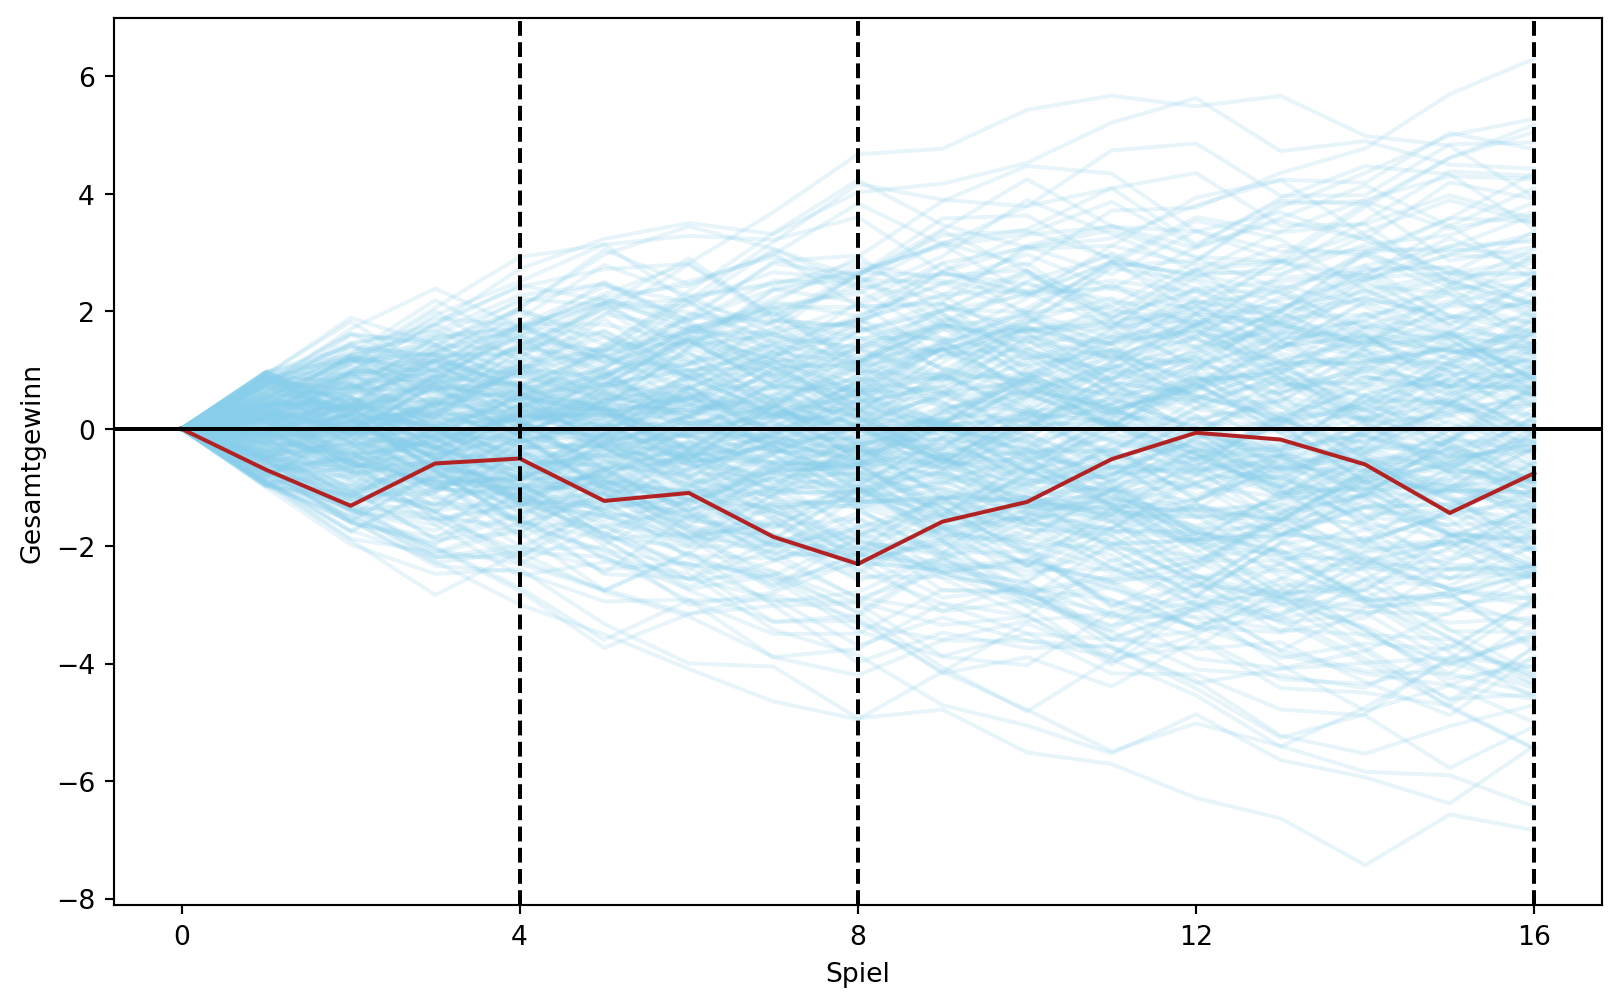

In [7]:
players_n = 300
games_n = 16

# Create a DataFrame similar to expand_grid in R
unif_games = pd.DataFrame(
    np.array(
        np.meshgrid(
            np.arange(1, games_n + 1),
            np.arange(1, players_n + 1)
        )).T.reshape(-1, 2),
    columns=['game', 'player']
)

# Add result column with random uniform values between -1 and 1
unif_games['result'] = np.random.uniform(-1, 1, size=len(unif_games))

# Add initial values for each player
initial_values = pd.DataFrame(
    {'player': np.arange(1, players_n + 1), 'game': 0, 'result': 0})
unif_games = pd.concat([unif_games, initial_values])

# Sort values and calculate running total for each player
unif_games = unif_games.sort_values(['player', 'game'])
unif_games['running_total'] = unif_games.groupby('player')['result'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
for player in unif_games['player'].unique():
    player_data = unif_games[unif_games['player'] == player]
    plt.plot(player_data['game'], player_data['running_total'],
             color='skyblue', alpha=0.2)

# First player
player_data = unif_games[unif_games['player'] == 1]
plt.plot(player_data['game'], player_data['running_total'],
         color='firebrick', label='Player 1')

plt.axhline(0, color='black')

for mark in [4, 8, 16]:
    plt.axvline(x=mark, linestyle='--', color='black')

plt.xlabel('Spiel')
plt.ylabel('Gesamtgewinn')
plt.xticks([0, 4, 8, 12, 16])

Text(0.5, 0, 'Running total')

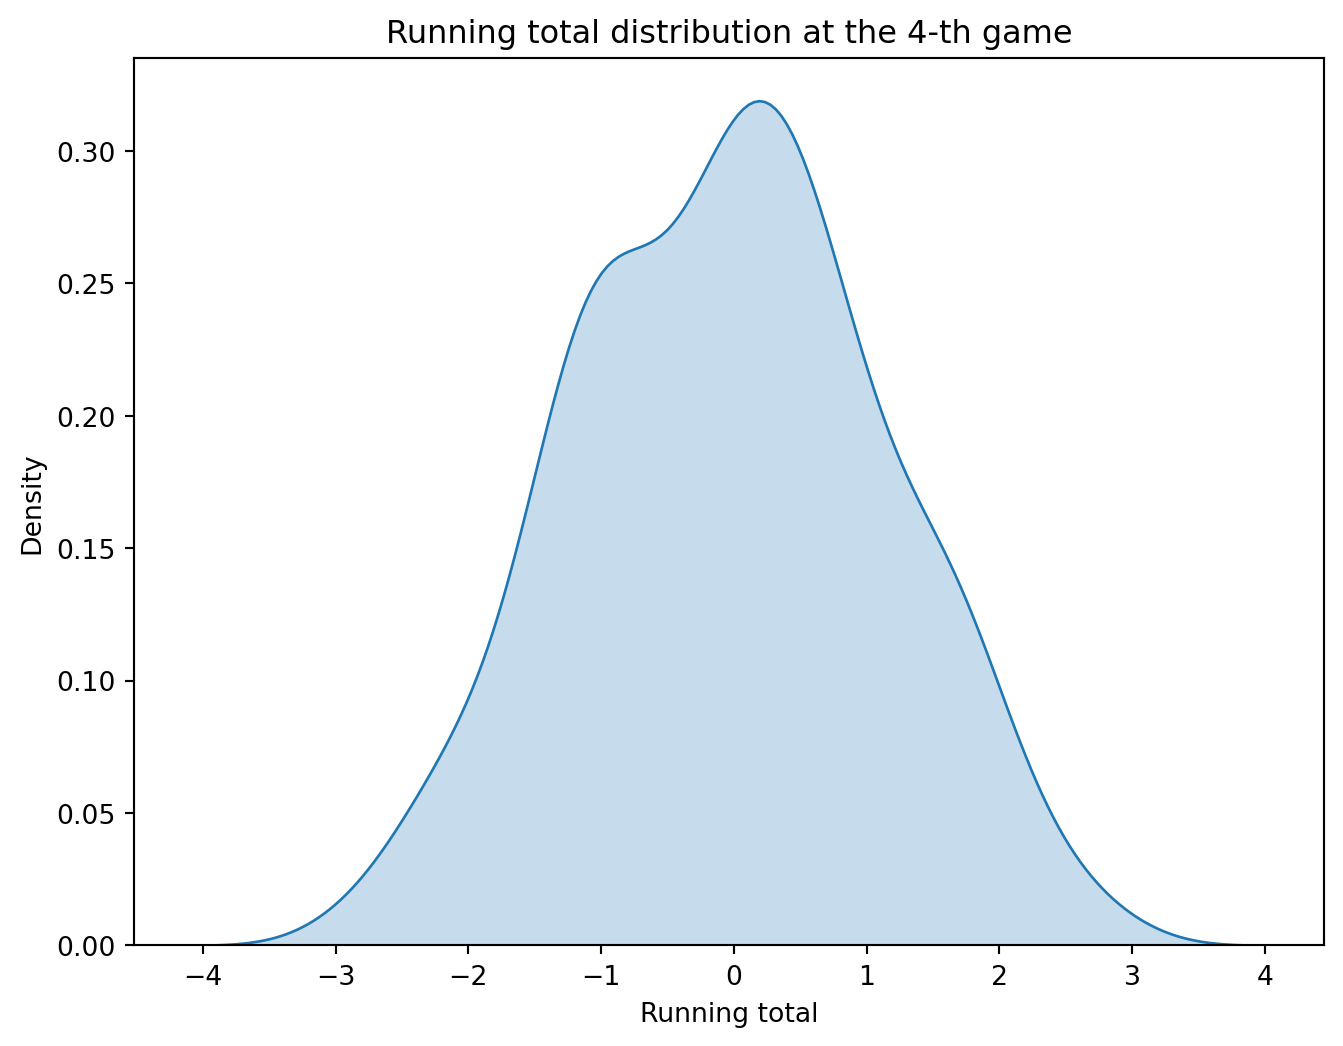

In [8]:
game_4 = unif_games[unif_games['game'] == 4]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=game_4, x='running_total', fill=True)
plt.title('Running total distribution at the 4-th game')
plt.xlabel('Running total')

Text(0.5, 0, 'Running total')

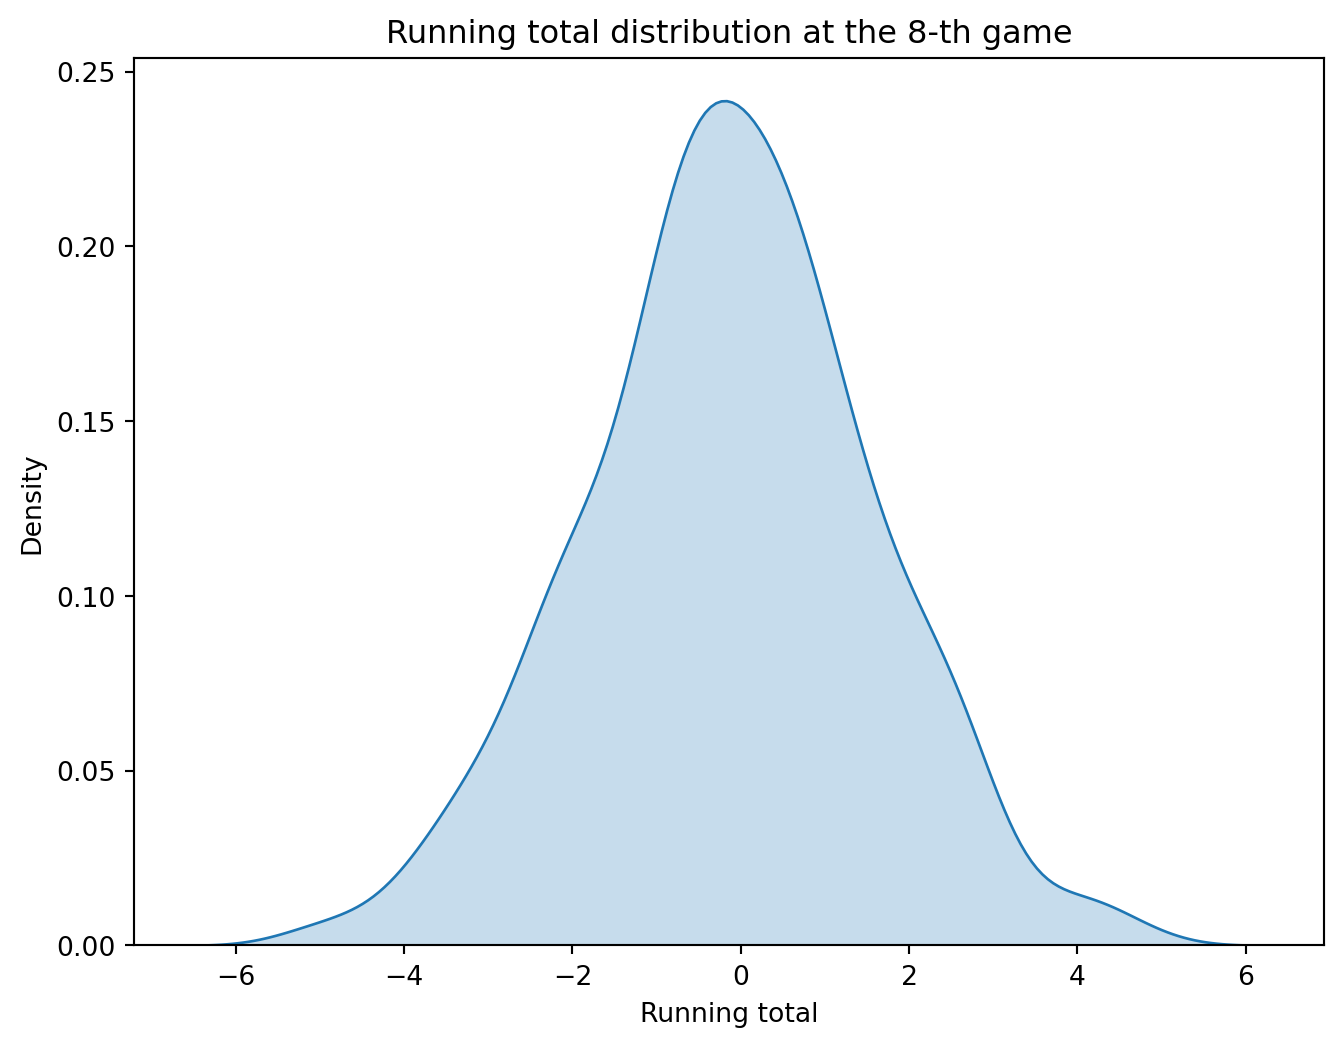

In [9]:
# Density estimate plot for the 8-th game

game_8 = unif_games[unif_games['game'] == 8]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=game_8, x='running_total', fill=True)
plt.title('Running total distribution at the 8-th game')
plt.xlabel('Running total')

Text(0.5, 0, 'Running total')

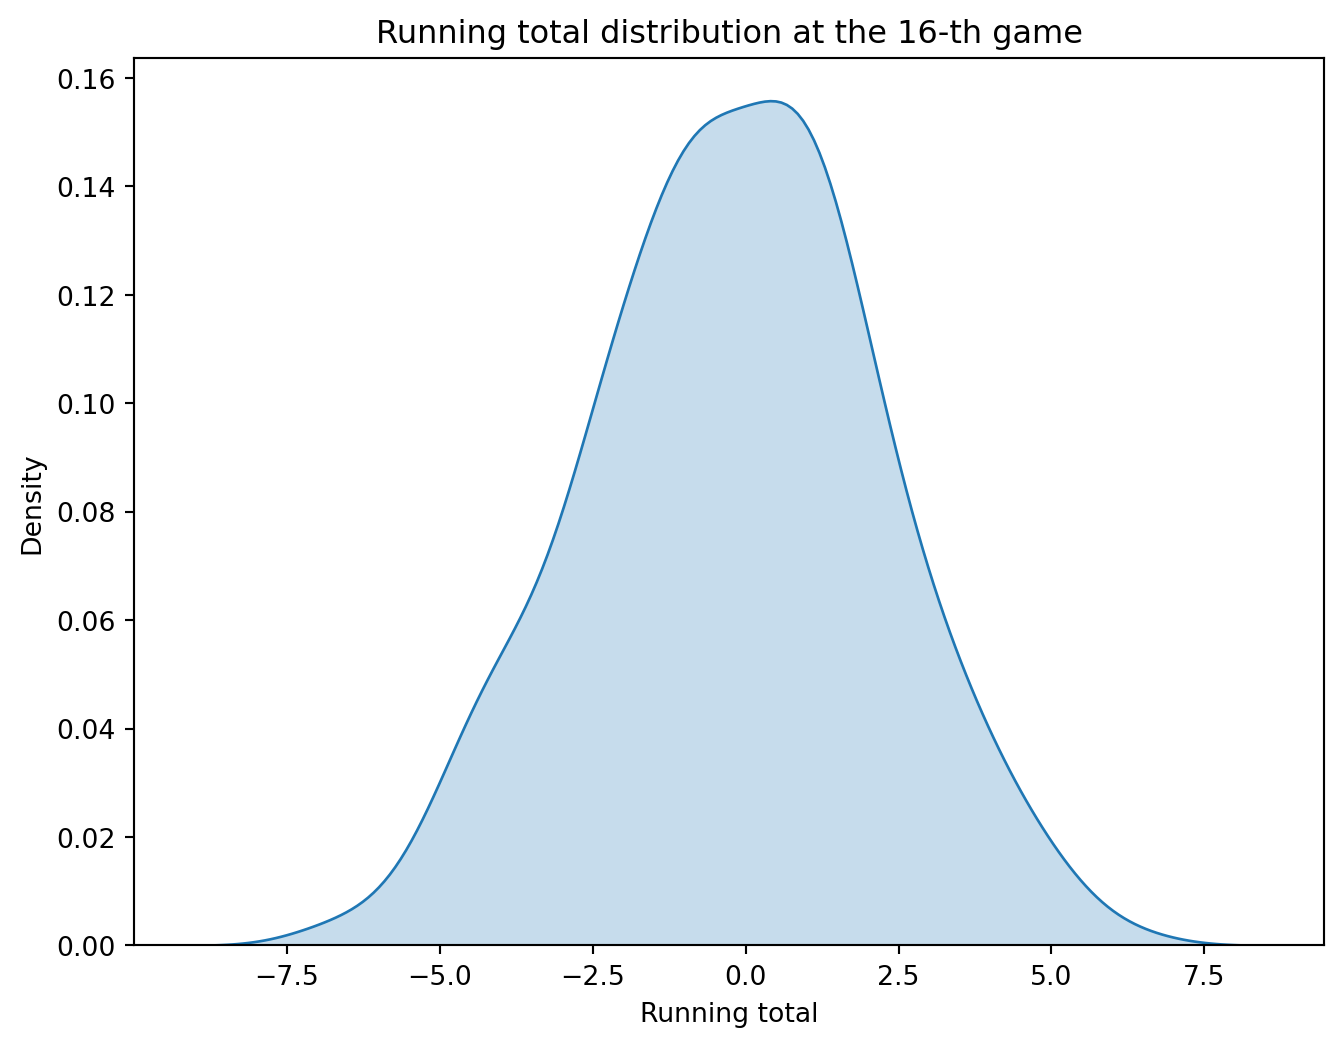

In [10]:
game_16 = unif_games[unif_games['game'] == 16]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=game_16, x='running_total', fill=True)
plt.title('Running total distribution at the 16-th game')
plt.xlabel('Running total')